In [8]:
import os
from vp_analysis_api import VPAnalysisAPI

# generate and download api key file from https://portal.variantperception.com/vp-data-api
# save the value in your local user directory (C:/Users/John/vp_api_key.txt)
# or set the key as an environment variable: VP_ANALYSIS_API_KEY 
if "VP_ANALYSIS_API_KEY" in os.environ:
    print("Reading API key from environment")
    api_key = os.environ.get("VP_ANALYSIS_API_KEY")
else:
    with open(os.path.expanduser('~/vp_api_key.txt'), 'r') as file:
        print("Reading API key from file")
        api_key = file.read().replace('\n', '')
print(f"API Key: {api_key[:5]}...")
api = VPAnalysisAPI(api_key)


Reading API key from environment
API Key: eyJhb...


In [9]:
# Get tactical Fast Money data for S&P 500 and ACWI. Filter data by date range
data = api.get_series(["ss:spx$vp_fast_money", "ss:acwi$vp_fast_money"], start_date='2010-01-01', end_date='2012-01-01')

# optional step to enforce frequency and forward-fill holes in data
data = api.clean_df(data, freq='D', start_date=None)

data

[['vp:ss:acwi$vp_fast_money', 'vp:ss:spx$vp_fast_money']]


,ss:spx$vp_fast_money,ss:acwi$vp_fast_money
dt,,
2010-01-01,56.999054,55.760207
2010-01-02,56.999054,55.760207
2010-01-03,56.999054,55.760207
2010-01-04,58.284942,56.849700
2010-01-05,58.274060,56.968798
...,...,...
2011-12-28,49.024400,45.780999
2011-12-29,49.889758,46.353837
2011-12-30,49.769564,46.568131


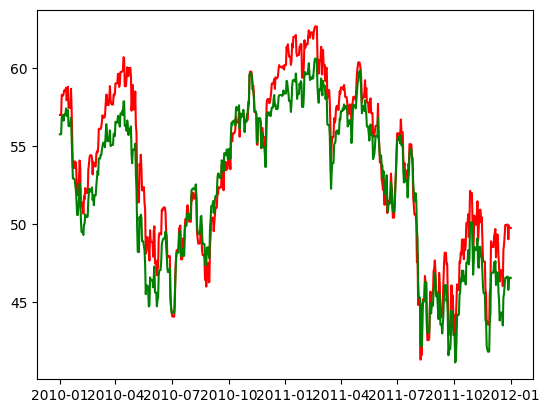

In [10]:
# Plot data
import matplotlib.pyplot as plt

plt.plot(data['ss:spx$vp_fast_money'], color='red')
plt.plot(data['ss:acwi$vp_fast_money'], color='green')

[['vp:lei_us_grow', 'vp:lei_us_infl']]


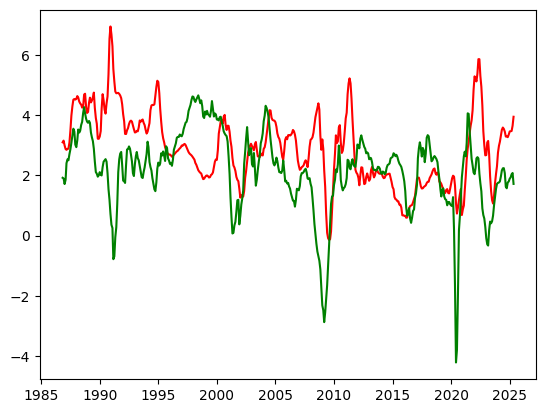

In [11]:
# Get US leading indicators
import matplotlib.pyplot as plt

data = api.get_series(["lei_us_grow", "lei_us_infl"])
data = api.clean_df(data, freq='M', start_date=None)

plt.plot(data['lei_us_infl'], color='red')
plt.plot(data['lei_us_grow'], color='green')


[['vp:bcfi24', 'vp:globexliq24', 'vp:mehrlingmult']]


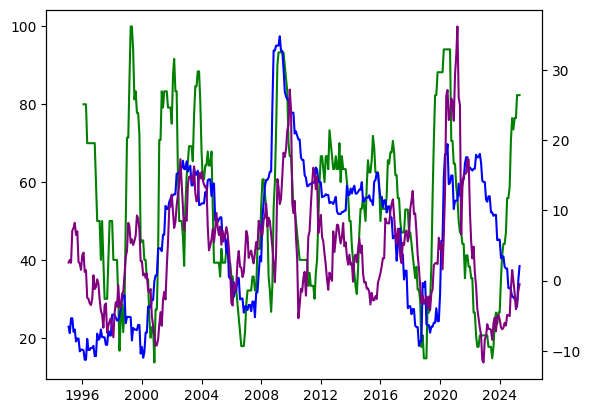

In [12]:
# Get cyclical models: BCFI, Global Excess Liquidity, and Mehrling Multiplier
import matplotlib.pyplot as plt

data = api.get_series(["bcfi24", "globexliq24", "mehrlingmult"])
data = api.clean_df(data, freq='M', start_date='1995-01-01')

plt.plot(data['bcfi24'], color='green')
plt.plot(data['mehrlingmult'], color='blue')
plt.twinx().plot(data['globexliq24'], color='purple')
